<a href="https://colab.research.google.com/github/MarceloFR04/PROSPECCION/blob/master/Prospecci%C3%B3n_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importamos librerías clave:
import numpy as np # algebra lineal
import pandas as pd # trabajar con tablas
import matplotlib.pyplot as plt # graficas

# import keras as K # redes neuronales
import tensorflow.keras as K # EL NUEVO KERAS!!!!!!!! (el anterior tiene problemas)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/archivos python/BASE_PROSPECCION.csv')

In [0]:
df.head() # observar la cabecera de datos

,PERIODO,TIPDOC,NUMDOC,EDAD,SEXO,IPNETO,LINEA_USD,NUM_TELEF,FLG_DEPENDIENTE,PRODUCTO,NIVELRIESGO,CANAL_ASIGNADO,FLG_BENCH_12M,DEPARTAMENTO,ZONA,PROSPECTO_PREMIUM,FLG_TARJ_ADIC,NUM_TC,NUM_TC_ACTIVAS,NUM_TC_BENCH,NUM_TC_BENCH_ACT,NUM_TC_RETAIL,NUM_TC_RETAIL_ACT,NUM_TC_OTROS,NUM_TC_OTROS_ACT,SUM_LINEAS_RCC,SUM_LINEAS_BENCH,SUM_LINEAS_RETAIL,SUM_LINEAS_OTROS,SUM_SALDO_RCC,SUM_SALDO_BENCH,SUM_SALDO_RETAIL,SUM_SALDO_OTROS,MAX_LINEA_RCC,AVG_LINEA_RCC,MAX_SALDO_RCC,AVG_SALDO_RCC,MAX_ENTIDAD_RCC,USO_LINEA_RCC,USO_MAXLINEA_RCC,MAX_LINEA_BENCH,AVG_LINEA_BENCH,MAX_SALDO_BENCH,AVG_SALDO_BENCH,MAX_ENTIDAD_BENCH,USO_LINEA_BENCH,USO_MAXLINEA_BENCH,MAX_LINEA_RETAIL,AVG_LINEA_RETAIL,MAX_SALDO_RETAIL,AVG_SALDO_RETAIL,MAX_ENTIDAD_RETAIL,USO_LINEA_RETAIL,USO_MAXLINEA_RETAIL,MAX_LINEA_OTROS,AVG_LINEA_OTROS,MAX_SALDO_OTROS,AVG_SALDO_OTROS,MAX_ENTIDAD_OTROS,USO_LINEA_OTROS,USO_MAXLINEA_OTROS,SALDO_PLD,SALDO_VEHICULAR,SALDO_HIPOTECARIO,SALDO_TOTAL,CUOTA_CONSUMO,FACTOR_ENDEU_CONSUMO,CUOTA_TOTAL,FACTOR_ENDEU_TOTAL,CALIFICACION,FLG_FORMALIZO
0,201908,1,410526,57,2,5727.7500,5500,1,1,1,1,3,0,10,-1,0,0,3,1,0,0,3,1,0,0,61200.00,0.00,61200.0,0.0,188.37,0.00,188.37,0.0,23100.00,4371.43,188.37,13.46,10,0.00,0.01,0.00,0.00,0.00,0.00,0,0.00,0.00,23100.0,15300.0,188.37,47.09,10,0.0,0.01,0.0,0.0,0.0,0.0,6,0.0,0.0,0.00,0.0,0.0,188.37,8.48,0.00,8.48,0.00,0,0
1,201908,1,443944,47,1,2052.9888,3000,1,1,1,4,-1,1,10,-1,0,0,1,1,1,1,0,0,0,0,33963.86,33963.86,0.0,0.0,6654.88,6654.88,0.00,0.0,33963.86,2425.99,6654.88,475.35,3,0.20,0.20,33963.86,8490.97,6654.88,1663.72,3,0.20,0.20,0.0,0.0,0.00,0.00,10,0.0,0.00,0.0,0.0,0.0,0.0,6,0.0,0.0,0.00,0.0,0.0,14129.80,299.47,0.15,299.47,0.15,0,0
2,201908,1,446001,44,1,1516.4017,1600,2,1,1,2,4,1,10,-1,0,0,1,1,1,1,0,0,0,0,4766.15,4766.15,0.0,0.0,346.59,346.59,0.00,0.0,4766.15,340.44,346.59,24.76,4,0.07,0.07,4766.15,1191.54,346.59,86.65,4,0.07,0.07,0.0,0.0,0.00,0.00,10,0.0,0.00,0.0,0.0,0.0,0.0,6,0.0,0.0,0.00,0.0,0.0,346.59,15.60,0.01,15.60,0.01,0,0
3,201908,1,446081,44,2,1650.5712,4800,1,1,1,2,-1,0,10,-1,0,0,1,0,0,0,0,0,1,0,3750.00,0.00,0.0,3750.0,0.00,0.00,0.00,0.0,3750.00,267.86,0.00,0.00,11,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.0,0.0,0.00,0.00,10,0.0,0.00,3750.0,625.0,0.0,0.0,11,0.0,0.0,7655.42,0.0,0.0,7655.42,306.22,0.19,306.22,0.19,0,0
4,201908,1,447703,44,1,5948.6000,19700,2,1,2,2,3,1,2,-1,0,0,4,2,1,1,3,1,0,0,77830.00,55800.00,22030.0,0.0,175.57,103.24,72.33,0.0,55800.00,5559.29,103.24,12.54,1,0.00,0.00,55800.00,13950.00,103.24,25.81,1,0.00,0.00,12400.0,5507.5,72.33,18.08,10,0.0,0.01,0.0,0.0,0.0,0.0,6,0.0,0.0,0.00,0.0,0.0,175.57,7.90,0.00,7.90,0.00,0,0


In [0]:
df.describe()

,PERIODO,TIPDOC,NUMDOC,EDAD,SEXO,IPNETO,LINEA_USD,NUM_TELEF,FLG_DEPENDIENTE,PRODUCTO,NIVELRIESGO,CANAL_ASIGNADO,FLG_BENCH_12M,DEPARTAMENTO,ZONA,PROSPECTO_PREMIUM,FLG_TARJ_ADIC,NUM_TC,NUM_TC_ACTIVAS,NUM_TC_BENCH,NUM_TC_BENCH_ACT,NUM_TC_RETAIL,NUM_TC_RETAIL_ACT,NUM_TC_OTROS,NUM_TC_OTROS_ACT,SUM_LINEAS_RCC,SUM_LINEAS_BENCH,SUM_LINEAS_RETAIL,SUM_LINEAS_OTROS,SUM_SALDO_RCC,SUM_SALDO_BENCH,SUM_SALDO_RETAIL,SUM_SALDO_OTROS,MAX_LINEA_RCC,AVG_LINEA_RCC,MAX_SALDO_RCC,AVG_SALDO_RCC,MAX_ENTIDAD_RCC,USO_LINEA_RCC,USO_MAXLINEA_RCC,MAX_LINEA_BENCH,AVG_LINEA_BENCH,MAX_SALDO_BENCH,AVG_SALDO_BENCH,MAX_ENTIDAD_BENCH,USO_LINEA_BENCH,USO_MAXLINEA_BENCH,MAX_LINEA_RETAIL,AVG_LINEA_RETAIL,MAX_SALDO_RETAIL,AVG_SALDO_RETAIL,MAX_ENTIDAD_RETAIL,USO_LINEA_RETAIL,USO_MAXLINEA_RETAIL,MAX_LINEA_OTROS,AVG_LINEA_OTROS,MAX_SALDO_OTROS,AVG_SALDO_OTROS,MAX_ENTIDAD_OTROS,USO_LINEA_OTROS,USO_MAXLINEA_OTROS,SALDO_PLD,SALDO_VEHICULAR,SALDO_HIPOTECARIO,SALDO_TOTAL,CUOTA_CONSUMO,FACTOR_ENDEU_CONSUMO,CUOTA_TOTAL,FACTOR_ENDEU_TOTAL,CALIFICACION,FLG_FORMALIZO
count,271810.0,271810.0,2.718100e+05,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.00000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,271810.000000,2.718100e+05,271810.000000,2.718100e+05,2.718100e+05,271810.000000,271810.000000,271810.000000,271810.000000,271810.0,271810.000000
mean,201908.0,1.0,2.788059e+07,43.587212,1.453810,2859.247202,5049.424230,1.093882,1.451293,1.269394,2.341787,0.516806,0.701516,2.209694,1.772334,0.009061,0.021011,2.188930,1.161789,0.890629,0.599375,1.091803,0.511048,0.206497,0.051367,27721.450915,19098.967151,6886.222339,1736.261424,3332.45719,2603.272543,617.265287,111.919360,18025.295480,1980.103696,2311.491090,238.032673,5.383146,0.108457,0.111856,15495.943576,4774.741857,2116.632605,650.818186,1.319823,0.093613,0.094202,5008.602365,1721.555767,561.812525,154.316355,10.985129,0.062273,0.072081,1697.352687,289.376841,111.241058,18.653230,6.557231,0.010794,0.010963,2.364863e+03,630.923006,1.773072e+04,2.259918e+04,424.598019,0.108429,424.598019,0.108429,0.0,0.021717
std,0.0,0.0,1.805273e+07,12.533987,0.547003,2305.562220,4220.142757,1.022943,0.497623,0.443646,0.886170,1.881043,0.457594,2.547031,2.505199,0.094760,0.143421,1.289355,0.974881,0.767600,0.675025,0.990988,0.711363,0.421446,0.223824,37544.671004,32955.524129,10361.605619,6271.592848,7776.27994,7245.500255,2025.820527,1039.540298,22640.996081,2681.762209,6049.220929,555.448557,4.580357,0.150706,0.180879,23420.515133,8238.881070,5978.849308,1811.375070,1.366443,0.170746,0.179762,6807.275445,2590.401470,1898.586796,506.455139,1.947965,0.144041,0.160647,6078.584669,1045.265456,1031.070144,173.256723,1.199566,0.069084,0.069966,1.299858e+04,5219.302546,8.204575e+04,8.023737e+04,1081.527630,0.173064,1081.527630,0.173064,0.0,0.145759
min,201908.0,1.0,1.757000e+03,0.000000,0.000000,1000.241300,1300.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [0]:
# Separamos X e Y's:
list_predictors = ['EDAD','SEXO','IPNETO','LINEA_USD','NUM_TELEF','FLG_DEPENDIENTE','PRODUCTO','NIVELRIESGO'
                   ,'CANAL_ASIGNADO','FLG_BENCH_12M','DEPARTAMENTO','ZONA','NUM_TC','NUM_TC_ACTIVAS']
list_target = ['FLG_FORMALIZO']

X = df[list_predictors]
Y = df[list_target]

In [0]:
# Extraemos el numero de columnas de X:
num_cols = X.shape[1]
num_cols

14

In [0]:
# Puntos a configurar
# 1) Arquitectura
# 2) Función de Activación

# Acá agregamos las capas!
model = K.Sequential([
    K.layers.Dense(6, activation='sigmoid', input_shape=(num_cols,)),
    K.layers.Dense(6, activation='sigmoid'),
    K.layers.Dense(3, activation='sigmoid'),
    K.layers.Dense(1, activation='linear')
])

# la sigmoid son valores entre 0<sigmoid<1
# pongo la última lineal porque quiero que me de el valor de un terreno que no esta entre 0 y 1

model.summary() # resumen de la arquitectura

W0913 04:10:33.043246 140648803846016 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Gradiente de aprendizaje - se recomienda como mínimo 0.001 y máximo 0.01
# Definimos el optimizador y la función de perdida de la RED:
model.compile(optimizer=K.optimizers.SGD(learning_rate=0.005), 
              loss='MSE', 
              metrics = ['MAE', 'MAPE']) # estas son metricas extras OPCIONALES

In [0]:
# 5) el batch es el tamaño en el que voy a dividir mi data
# Es buena práctica definir hiperparametros arriba!
batch_size = 50000 # recordar que tenemos 500 registros, nada más
epochs = 100

# 6) Epocas: número de idas y vueltas

# 7) % de validación

# Entrenamos!
log = model.fit(
    x = X, y = Y, batch_size = batch_size, epochs = epochs,
    validation_split=0.15 # 15% para validacion
)

Train on 231038 samples, validate on 40772 samples
Epoch 1/100
231038/231038 [==============================] - 1s 2us/sample - loss: 0.0308 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 71057248.0000 - val_loss: 0.0256 - val_mean_absolute_error: 0.0856 - val_mean_absolute_percentage_error: 65734448.0000
Epoch 2/100
231038/231038 [==============================] - 0s 1us/sample - loss: 0.0293 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 62676496.0000 - val_loss: 0.0243 - val_mean_absolute_error: 0.0776 - val_mean_absolute_percentage_error: 57828728.0000
Epoch 3/100
231038/231038 [==============================] - 0s 1us/sample - loss: 0.0280 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 55069280.0000 - val_loss: 0.0232 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 50623816.0000
Epoch 4/100
231038/231038 [==============================] - 0s 1us/sample - loss: 0.0269 - mean_absolute_error: 0.0715 - mean_abs

Text(0.5,0,'Epochs')

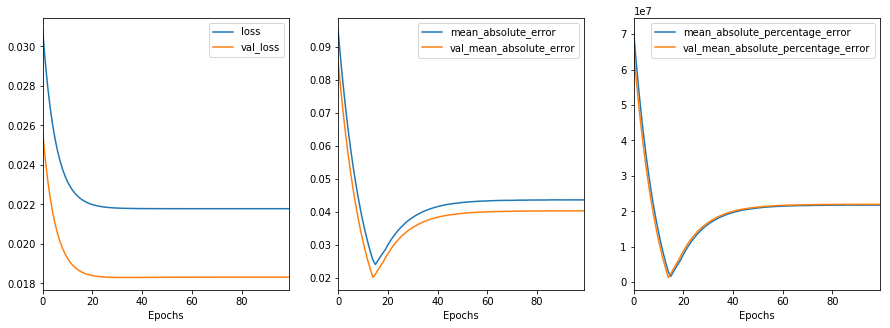

In [0]:
# Siempre es útil visualizar el historial de entrenamiento para asegurarnos que el modelo no sobreajuste!
historial = pd.DataFrame(log.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
historial[['loss', 'val_loss']].plot(ax=ax1)
historial[['mean_absolute_error', 'val_mean_absolute_error']].plot(ax=ax2)
historial[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(ax=ax3)

ax1.set_xlabel('Epochs')
ax2.set_xlabel('Epochs')
ax3.set_xlabel('Epochs')

# si en el último grafico la linea naranja esta por encima de la azul significa que no ha aprendido
# al igual que en las primeras graficas las lineas deben estar más juntas para que este bien